In [1]:
import matplotlib

import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()

matplotlib.rc('font',family = font_name)

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
# 데이터 불러오기
df_raw=pd.read_csv("유방암.csv", engine="python")
df_raw.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# 목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["diagnosis"]
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False)

#train_test_split(x: 설명변수 데이터, y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [5]:
# train은 0.4, train의 validation은 0.3이 되도록 train_data를 다시 분할
df_train_x, df_val_x, df_train_y, df_val_y=train_test_split(df_train_x, df_train_y, test_size=3/7)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


In [6]:
# 모델 생성. 기본 옵션. 모델 설명력은 train 99.6%, validation 94.2%로 모델은 train 데이터에 과대적합
tree_uncustomized=RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on validation set: {:.3f}".format(tree_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set: 0.996
Accuracy on validation set: 0.942


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
# # 모델 파라미터 조정
# # n_estimators: 트리 수 변경에 따른 모델 성능

# # train 및 test 설명력 결과 저장
# train_accuracy=[]
# validation_accuracy=[]

# # n_estimators: 트리 수 변경: 1 ~ 100
# para_n_tree=[n_tree*10 for n_tree in range(1,16)]

# for v_n_estimators in para_n_tree:
#     rf=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
#     rf.fit(df_train_x, df_train_y)
#     train_accuracy.append(rf.score(df_train_x, df_train_y))
#     validation_accuracy.append(rf.score(df_val_x, df_val_y))
    
# # 결과 저장
# df_accuracy_n=pd.DataFrame()
# df_accuracy_n["n_estimators"]=para_n_tree
# df_accuracy_n["TrainAccuracy"]=train_accuracy
# df_accuracy_n["ValidationAccuracy"]=validation_accuracy

# # 모델 설명력 확인 => 20개
# df_accuracy_n.round(3)

In [8]:
# # 모델 설명력 그래프 확인=> 트리 수 20 모델 선택 (validation score 기준)
# plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
# plt.plot(para_n_tree, validation_accuracy, linestyle="--", label="Validation Accuracy")
# plt.ylabel("accuracy")
# plt.xlabel("n_estimators")
# plt.legend()

In [14]:
# error  저장 리스트
oob_error=[]

for v_n_estimator in range(55,61):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

Text(0.5, 0, 'n_estimators')

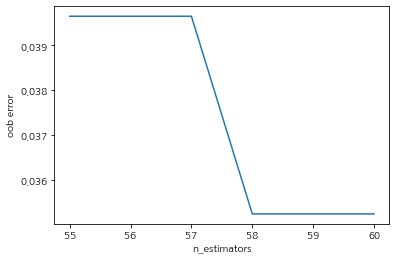

In [15]:
# 그래프로 표현 => 58 개
plt.plot(range(55,61), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")


In [18]:
# max_depth 최대 깊이 변경에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth, n_estimators=58, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    validation_accuracy.append(rf.score(df_val_x, df_val_y))
    
# 결과 저장
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidationAccuracy"]=validation_accuracy

# 모델 설명력 확인 => 4개
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidationAccuracy
0,1,0.947,0.901
1,2,0.969,0.912
2,3,0.982,0.936
3,4,0.991,0.936
4,5,0.996,0.930
5,6,1.000,0.930
6,7,1.000,0.930
7,8,1.000,0.930
8,9,1.000,0.930
9,10,1.000,0.930


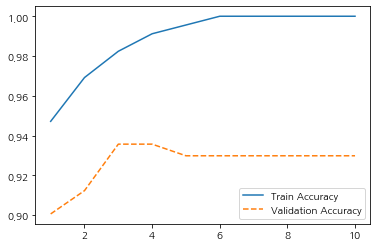

In [17]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [20]:
# min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# max_depth: 최대 깊이 변경에 따른 모델 성능
para_split=[n_split*10 for n_split in range(1,15)]

for v_min_samples_split in para_split:
    tree=RandomForestClassifier(random_state=1234, n_estimators=58,  max_depth=4, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    validation_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장    
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=validation_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,10,0.991,0.936
1,20,0.987,0.936
2,30,0.987,0.936
3,40,0.982,0.936
4,50,0.982,0.942
5,60,0.974,0.953
6,70,0.978,0.953
7,80,0.974,0.953
8,90,0.965,0.953
9,100,0.965,0.918


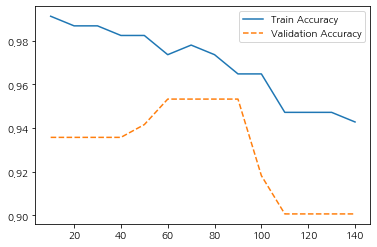

In [21]:
# 모델 설명력 그래프 확인 => 60개
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [22]:
# 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]

# min_samples_leaf: 잎사귀 노드 최소 자료 수 제한
para_leaf=[n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=RandomForestClassifier(min_samples_leaf=v_min_samples_leaf, 
                                n_estimators=58,  max_depth=4, min_samples_split=60, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    validation_accuracy.append(tree.score(df_val_x, df_val_y))
    
    
# 데이터 테이블로 저장
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidationAccuracy"]=validation_accuracy

# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,2,0.969,0.953
1,4,0.960,0.953
2,6,0.960,0.953
3,8,0.969,0.947
4,10,0.969,0.936
5,12,0.969,0.930
6,14,0.965,0.930
7,16,0.956,0.930
8,18,0.952,0.930
9,20,0.952,0.924


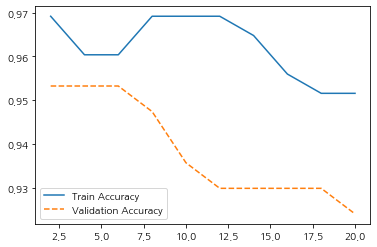

In [23]:
# 모델 정확도 그래프 확인 => 6 선택
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [24]:
# 최종 모델 선정
# 최종 모델
tree_final=RandomForestClassifier(n_estimators=58, max_depth=4, min_samples_split=60, min_samples_leaf=6, random_state=1234)
tree_final.fit(df_train_x, df_train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=58,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [25]:
# 최종모델평가
# 최종모델을 이용한 분류 예측
# 평가
y_pred=tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.930

Confusion matrix: 
[[100   5]
 [  7  59]]
